This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). For additional details, please see the attached data dictionary in the ‘About’ section.

link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

- Objetivo:

- Classificar se determinada é segura ou não com relação a ocorrência dr crimes de  assalto ou roubo.

## 1 - Carregando os dados.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('delitos_novo_nyc.csv',sep=',')

In [73]:
df.head()

,desc_instalacoes,delito,data_da_ocorr,hora_da_ocorr,conclusao,desc_delito,nivel_delito,loc_esp_delito,bairro,latitude,...,dia,mes,ano,dia_da_semana,idade_vitima,raca_vitima,sexo_vitima,noite,assalto,fds
0,COMMERCIAL BUILDING,THEFT-FRAUD,2006-01-01,00:01:00,1,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,Brooklyn,40.602071,...,1,1,2006,domingo,25-44,WHITE,M,1,0,0
1,RESIDENCE - APT. HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Brooklyn,40.697964,...,1,1,2006,domingo,NaN,UNKNOWN,F,1,0,0
2,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,AGGRAVATED SEXUAL ASBUSE,crime,dentro,Brooklyn,40.671107,...,1,1,2006,domingo,<18,BLACK,F,1,0,0
3,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,09:00:00,1,SEXUAL ABUSE,crime,dentro,Queens,40.586466,...,1,1,2006,domingo,<18,AMERICAN INDIAN/ALASKAN NATIVE,F,0,0,0
4,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Brooklyn,40.697964,...,1,1,2006,domingo,<18,BLACK,F,1,0,0


In [75]:
df.assalto.value_counts(normalize=True)

0    0.69035
1    0.30965
Name: assalto, dtype: float64

- Selecionando as colunas para a modelagem.

In [76]:
dados_ml = df[['hora','noite','dia','dia_da_semana','mes','fds',
                  'bairro','desc_instalacoes','sexo_vitima',
                  'latitude', 'longitude','assalto']]

In [79]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488539 entries, 0 to 490507
Data columns (total 12 columns):
hora                488539 non-null int64
noite               488539 non-null int64
dia                 488539 non-null int64
dia_da_semana       488539 non-null object
mes                 488539 non-null int64
fds                 488539 non-null int64
bairro              488539 non-null object
desc_instalacoes    488539 non-null object
sexo_vitima         488539 non-null object
latitude            488539 non-null float64
longitude           488539 non-null float64
assalto             488539 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 48.5+ MB


In [78]:
dados_ml = dados_ml.dropna()

- Tratando variáveis categóricas.

In [80]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

dados_ml['dia_da_semana'] = lb.fit_transform(dados_ml['dia_da_semana'])
dados_ml['bairro'] = lb.fit_transform(dados_ml['bairro'])
dados_ml['desc_instalacoes'] = lb.fit_transform(dados_ml['desc_instalacoes'])
dados_ml['sexo_vitima'] = lb.fit_transform(dados_ml['sexo_vitima'])

# dados_ml = pd.get_dummies(dados_ml)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# for col in dados_ml.columns:
#   if col != "assalto":
#     dados_ml[col] = scaler.fit_transform(np.array(dados_ml[col]).reshape(-1,1))



In [81]:
dados_ml.head()

,hora,noite,dia,dia_da_semana,mes,fds,bairro,desc_instalacoes,sexo_vitima,latitude,longitude,assalto
0,0,1,1,0,1,0,1,18,1,40.602071,-74.002692,0
1,0,1,1,0,1,0,1,52,0,40.697964,-73.918083,0
2,0,1,1,0,1,0,1,54,0,40.671107,-73.881433,0
3,9,0,1,0,1,0,3,54,0,40.586466,-73.816522,0
4,0,1,1,0,1,0,1,54,0,40.697964,-73.918083,0


### Separando os dados de treino e teste.

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = dados_ml.drop('assalto',axis=1)
Y = dados_ml['assalto']

In [84]:
X_treino, X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## 4.2 **Testando algoritmos**

In [85]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 69.09%


Text(33,0.5,'Real ( 1 ou 0)')

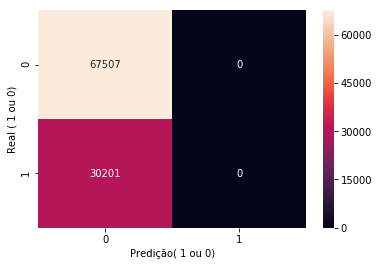

In [86]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [87]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:,1])

0.5

In [88]:
print(classification_report(Y_teste, y_pred))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82     67507
          1       0.00      0.00      0.00     30201

avg / total       0.48      0.69      0.56     97708



### Triagem com outros modelos

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Acuracia
Treino: 0.6909073231140825
Teste: 0.6909055553281205
ROC AUC
Treino 0.5817619486398858
Test 0.583227460769487
GaussianNB
Acuracia
Treino: 0.6770547883867963
Teste: 0.6775699021574487
ROC AUC
Treino 0.6137976893091837
Test 0.61482536320943
RandomForestClassifier
Acuracia
Treino: 0.9773226791119435
Teste: 0.6837925246653294
ROC AUC
Treino 0.9989263671568714
Test 0.6348732047677595
XGBClassifier
Acuracia
Treino: 0.6996758189601132
Teste: 0.6991443894051664
ROC AUC
Treino 0.6803128117157802
Test 0.679135937323095


- Repetindo com validação cruzada.

In [90]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.6909073231140825
Validation score 0.6909073231440782
Teste: 0.6909055553281205
ROC AUC
Treino 0.5817619486398858
Test 0.583227460769487
GaussianNB
Treino: 0.6770547883867963
Validation score 0.6770727042590633
Teste: 0.6775699021574487
ROC AUC
Treino 0.6137976893091837
Test 0.61482536320943
RandomForestClassifier
Treino: 0.9772587128451939
Validation score 0.6831443626466125
Teste: 0.6818888934375895
ROC AUC
Treino 0.9989413846494948
Test 0.6335575240969473
XGBClassifier
Treino: 0.6996758189601132
Validation score 0.6985883923387319
Teste: 0.6991443894051664
ROC AUC
Treino 0.6803128117157802
Test 0.679135937323095


# Ajustando o XGBClassifier.

In [91]:
# clf = XGBClassifier(seed=42)
clf = XGBClassifier(max_depth=15,n_estimators=250,subsample=0.5,seed=42)

In [92]:
clf.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.5)

In [93]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do XGBclassifier foi %.2f%%' % acuracia)

A acurácia do XGBclassifier foi 70.03%


Text(33,0.5,'Real ( 1 ou 0)')

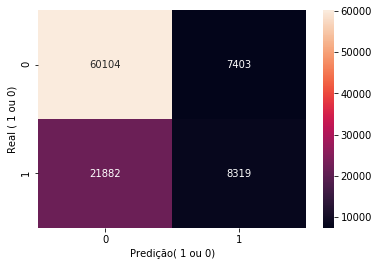

In [94]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [95]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6795743639700114

In [96]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.73      0.89      0.80     67507
          1       0.53      0.28      0.36     30201

avg / total       0.67      0.70      0.67     97708



# Austando o RandomForestClassifier.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
clf = RandomForestClassifier(criterion='entropy',
                             class_weight='balanced',
                             max_features="log2",
                             max_depth=15,
                             n_estimators=50,
                             random_state=42)
clf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [106]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do RandomForestclassifier foi %.2f%%' % acuracia)

A acurácia do RandomForestclassifier foi 64.10%


Text(33,0.5,'Real ( 1 ou 0)')

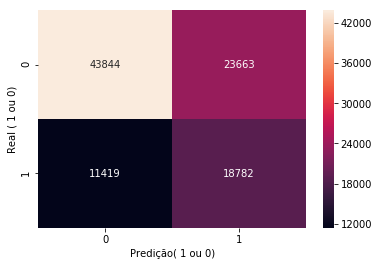

In [107]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [108]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6859910315424899

In [109]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.79      0.65      0.71     67507
          1       0.44      0.62      0.52     30201

avg / total       0.68      0.64      0.65     97708



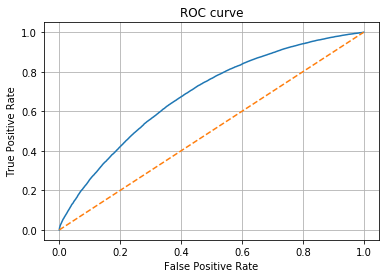

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

 - Visualizando árvore de decisão de baixa profundidade.

In [104]:
# from sklearn.tree import plot_tree


# plt.figure(figsize=(20,10))
# annotations = plot_tree(clf.estimators_[0],
#                         feature_names=dados_ml.drop('conclusao',axis=1).columns,
#                         filled=True)

 - Salvando o modelo

In [85]:
# import pickle

# output = open('classificacao_assalto', 'wb')
# pickle.dump(clf, output)
# output.close()